In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Refs:
# - Martinod+ 2021 Applied Optics 60(19), Appendix A
# - Klinner-Teo, thesis

# 1 tricoupler, no photometric tap (Martinod, Eqn. 1)

In [54]:
# transfer matrix of 
# 1 tricoupler, no photometric tap (Martinod, Eqn. 1)

phase_shift = 2.*np.pi/3. # induced by phase shifters in waveguides; assumed achromatic; 120 deg = 2*pi/3
phase_term = np.exp(1j * phase_shift) # for matrix

T_tri = np.sqrt(1./3.) * np.array([[1,          phase_term, phase_term], 
                                   [phase_term, 1,          phase_term], 
                                   [phase_term, phase_term, 1]])


In [71]:
# output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, 0, phasor_right])

flux_output = np.abs(np.dot(T_tri, a_in))**2

print(flux_output)


[1.00000000e+00 3.08148791e-33 1.00000000e+00]


In [51]:
# output flux intensities: series of values as fcn of phase_right

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
phasor_left = amp_left * np.exp(1j * phase_left)

amp_right = 1
phase_right_values = np.linspace(0, 2*np.pi, 100)

flux_output_matrix = []  # Initialize an empty list
phase_right_list = []  # Initialize an empty list for phase_right values

for phase_right in phase_right_values:
    phasor_right = amp_right * np.exp(1j * phase_right)
    a_in = np.array([phasor_left, 0, phasor_right])
    flux_output = np.abs(np.dot(T_tri, a_in))**2
    flux_output_matrix.append(flux_output)  # Append flux_output to the list
    phase_right_list.append(phase_right)  # Append phase_right to the list

phase_right_matrix = np.array(phase_right_list)
flux_output_matrix = np.array(flux_output_matrix)


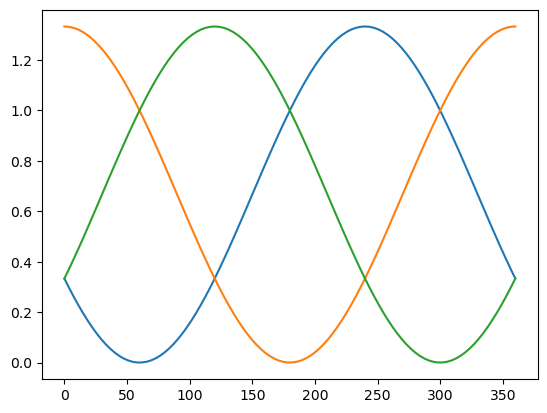

In [52]:
# plot

phase_right_matrix_deg = 180. * phase_right_matrix/np.pi

plt.plot(phase_right_matrix_deg, flux_output_matrix[:,0])
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,1])
plt.plot(phase_right_matrix_deg, flux_output_matrix[:,2])
plt.show()

# 1 directional coupler, no photometric tap

In [70]:
# transfer matrix of 
# 1 directional coupler, no photometric tap (Klinner-Teo, Eqn. 2.1)

phase_shift = -np.pi/2. # induced by transfer from one waveguide to the other; assumed achromatic (WHAT DOES - SIGN MEAN, PHYSICALLY? IS TERM SYMMETRIC?)
phase_term = np.exp(1j * phase_shift) # for matrix

T_dir = np.sqrt(1./2.) * np.array([[1,          phase_term], 
                                   [phase_term, 1           ]])

# output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, phasor_right])

flux_output = np.abs(np.dot(T_dir, a_in))**2

print(flux_output)

[1.70710678 0.29289322]


# 1 directional coupler, with photometric taps

In [76]:
# transfer matrices with photometric splitting
# (see Fig. 2.1 in Klinner-Teo; she calls this M_dirsplitter)

# splitting coefficient of that going into photometric tap at each such split (values for waveguides 1 and 2 assumed the same)
alpha_val = 0.5

# transfer matrix of photometric splitting
# Eqn. 2.4 in Klinner-Teo
M_dirsplit = np.array([[1 - alpha_val,         0          ], 
                        [0,                 1 - alpha_val   ], 
                        [alpha_val,             0           ],
                        [0,                     alpha_val]])

# transfer matrix of 
# 1 directional coupler, with photometric tap (IS THIS EQN RIGHT?)
T_dir = np.sqrt(1./2.) * np.array([[1,          phase_term,     1,  0], 
                                   [phase_term, 1,              0,  1]])

## output flux intensities: 1 value only

# incoming complex wavefronts (left, center=0, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

# (IS THIS EQN RIGHT?)
a_in = np.array([[phasor_left, phasor_right],[0, 0]])

# flux = | T_dir * M_dirsplit * a_in | ** 2
# dims bookkeeping: [2 x 4] * [4 x 2] * [2 x 1]
flux_output = np.abs(np.dot(T_dir,np.dot(M_dirsplit, a_in)))**2

print(flux_output)

[[0.5   0.5  ]
 [0.125 0.125]]


In [63]:
# output flux intensities: 1 value only

# incoming complex wavefronts (left, right)
amp_left = 1
phase_left = 0
amp_right = 1
phase_right = np.pi

phasor_left = amp_left * np.exp(1j * phase_left)
phasor_right = amp_right * np.exp(1j * phase_right)

a_in = np.array([phasor_left, phasor_right])

flux_output = np.abs(np.dot(T_dir, a_in))**2

print(flux_output)

[1. 1.]
